In [2]:
import numpy as np
from numpy.lib.format import open_memmap

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm

from pycbc.filter import sigma, matched_filter
from pycbc.types.timeseries import TimeSeries
from pycbc.waveform import get_td_waveform

parameters = pd.read_csv('./data/test_snr_gen/parameters.csv', index_col=0)
waveforms = open_memmap('./data/test_snr_gen/waveforms.npy', dtype=np.float64, mode='r')
projections = open_memmap('./data/test_snr_gen/projections.npy', dtype=np.float64, mode='r')
filters = open_memmap('./data/test_snr_gen/filters.npy', dtype=np.float64, mode='r')

def chirp_mass(m1, m2):
    return ((m1 * m2)**0.6)/ (m1 + m2)**0.2

In [3]:
sample_params = parameters.iloc[:].to_records()
sample_cms = []
for i in range(len(sample_params)):
    sample_cms.append(chirp_mass(sample_params[i][1], sample_params[i][2]))
print(sample_cms)

[14.438230444283516, 13.758271751594737, 11.311777241329874, 10.702266509717301, 16.812504539749057, 9.38293768217933, 10.693338642646472, 12.147299447846915, 13.61816818075425, 13.261016442636476, 12.96907635922285, 16.53296591901698, 11.915632059199995, 13.272680991117989, 13.497247185455391, 16.084424630266252, 11.450973495948368, 16.031312944590333, 12.237618943510844, 16.576623884384784, 12.890858586209898, 16.017666164347478, 13.673462030313779, 12.1415167078856, 14.127011851975354, 13.148072249354422, 12.071386147318675, 15.38229959346622, 12.42826186855836, 11.203050124932526, 14.915249660365927, 15.604793183545361, 12.907878005252432, 12.07229841854032, 9.062082015541716, 11.291465969627103, 10.557911640752046, 10.439175236426168, 13.985441305851786, 13.213152334843038, 12.258703806534301, 10.331874724232037, 16.634376136706045, 15.081993659820665, 12.922436952854481, 16.51351483242475, 16.1865179699055, 15.120449955602735, 13.942552787450557, 11.835119880349403, 14.0090362673

In [4]:
plt.plot(projections[0,0])
plt.show()

In [5]:
combined = zip(projections, filters)

for key, i in enumerate(zip(projections, filters)):
    print(key)
    print(i[0])
    print(i[1])

0
[[ -7.63315951   6.40833953 -14.81429073 ...  -0.92821522 -29.25154332
   32.99796071]
 [-46.71589717   5.91365965 -67.64791837 ... -71.33655804 -61.77498126
   -6.73016121]]
[[ 1.3626463e+02  3.0622289e+00  9.8529401e-01  8.0545992e-01]
 [ 3.1483276e+01  8.7896499e+00  9.8009252e-01  4.4977587e-01]
 [ 6.7306162e+01  5.0874353e+00  6.6806585e-01  2.0238717e-01]
 [ 1.4695945e+02  3.0857729e+00  8.9979945e-01 -3.1937775e-01]
 [ 9.8411660e+01  4.1146051e+00  8.7071892e-01  9.5195430e-01]
 [ 1.5098606e+02  3.0810697e+00  9.3948581e-01  1.3762514e-01]
 [ 2.3183615e+01  1.2330234e+01  4.1822629e-01 -1.2286384e-01]
 [ 1.0732916e+02  3.9644763e+00  9.9847947e-01  6.6545329e-01]
 [ 1.8237870e+02  2.8085435e+00  9.1574996e-01  2.9365034e-02]
 [ 5.7418325e+01  5.9441725e+00  9.7242991e-01 -5.8184803e-01]]
1
[[-70.40719386 -25.50255679 -22.95394578 ...  45.16376214 -47.3727836
  -58.16076259]
 [ 90.61913874  29.58656369  16.07193157 ...  22.44044622  -7.92901731
   -5.64876217]]
[[ 5.7056019e+01

[[-101.24717198  -25.71586201   38.68463565 ...  -63.58663791
   -42.59246304   -1.58425359]
 [   4.64397717    8.95282245   65.76067987 ...  -48.15830023
     3.07634725   64.99613595]]
[[ 4.3892338e+01  5.0911309e+00  9.8555538e-01  3.6938431e-01]
 [ 1.5749750e+02  2.1576806e+00  9.9886391e-01  6.2368339e-01]
 [ 2.8279651e+01  7.3073299e+00  9.9341903e-01  9.7396512e-01]
 [ 7.2748524e+01  3.6987842e+00  7.2956511e-01 -4.2352599e-01]
 [ 1.3107316e+02  2.4830118e+00  9.9809654e-01  6.2955006e-01]
 [ 1.4598545e+02  2.3274953e+00  8.4534325e-01  4.7915566e-01]
 [ 1.1147758e+02  2.8205066e+00  6.5951964e-01  8.2652947e-01]
 [ 6.5802724e+01  4.0726133e+00  9.6631422e-02 -1.9897230e-01]
 [ 1.8233325e+02  2.0757217e+00  9.4357490e-01 -4.2332828e-01]
 [ 2.7588155e+01  7.6198583e+00 -2.6930995e-01  4.2687844e-01]]
24
[[ 83.67426755   1.22364999 -12.62743865 ...   9.36821345  22.39746829
   14.09778906]
 [-13.03218074 -29.45956461 -53.55216607 ... -55.13496133  13.69815929
  -76.06962165]]
[[19

[[ 8.0495701e+01  5.3761394e+00  9.4806073e-01  9.6612185e-01]
 [ 6.9741131e+01  6.1096453e+00  9.9152224e-01 -8.0779914e-01]
 [ 1.3514017e+02  3.8678229e+00  9.3980126e-01 -2.4871247e-01]
 [ 1.9104269e+02  3.0603812e+00  7.8646247e-01 -6.0919380e-01]
 [ 3.6362367e+01  1.0037559e+01  2.2761200e-01 -5.2853497e-01]
 [ 4.9000642e+01  8.1579610e+00  9.9762054e-01  9.9774386e-01]
 [ 2.4674562e+02  2.6704149e+00  9.9322880e-01  7.8030343e-01]
 [ 1.1689586e+02  4.5063117e+00  8.8110195e-01  8.7684776e-01]
 [ 8.5634975e+01  5.5999939e+00  9.9304947e-01  9.9365092e-01]
 [ 1.6801214e+02  3.4246880e+00  9.3771536e-01  2.7701896e-01]]
47
[[  94.61652893   38.72242521  -45.04166623 ...  -71.0406625
     2.13063147   49.56330621]
 [   6.4784547    24.50171359 -132.05391182 ...   -5.95373414
    42.20491623    8.23937641]]
[[ 1.6044951e+02  2.9921609e+00  9.9682223e-01  4.7842761e-02]
 [ 8.3973569e+01  4.6747630e+00  6.5260829e-01  8.2078057e-01]
 [ 2.1657761e+02  2.4621209e+00  9.4220984e-01 -2.1388

In [8]:
import time

start_time = time.time()

snrs = []

for key, i in enumerate(zip(projections, filters)):
    
    temp2 = []
    
    projection = i[0]
    templates = i[1]
    
    for proj in projection:
        
        temp1 = []
    
        # convert sample to PyCBC time series
        strain_time_series = TimeSeries(proj,
                                        delta_t=1.0/4096, epoch=0,
                                        dtype=None, copy=True)
        # convert sample to PyCBC frequency series
        strain_freq_series = strain_time_series.to_frequencyseries()

        for template in tqdm(templates):

            # Generate optimal matched filtering template
            template_hp, template_hc = get_td_waveform(
                approximant="SEOBNRv4",
                mass1=template[0],
                mass2=template[1],
                spin1z=template[2],
                spin2z=template[3],
                f_lower=30,
                delta_t=1.0/4096,
            )
            # Convert template to PyCBC frequency series
            template_freq_series_hp = template_hp.to_frequencyseries(
                delta_f=strain_freq_series.delta_f)
            # Resize template to work with the sample
            template_freq_series_hp.resize(len(strain_freq_series))

            # Time shift the template so that the SNR peak matches the merger time
            template_freq_series_hp = template_freq_series_hp.cyclic_time_shift(template_freq_series_hp.start_time)

            # Compute SNR time-series from optimal matched filtering template
            snr_series = matched_filter(template_freq_series_hp,
                                        strain_freq_series.astype(complex),
                                        psd=None, low_frequency_cutoff=30)

            temp1.append(np.array(abs(snr_series)))

        cms = []
        for template in templates:
            cms.append(chirp_mass(template[0], template[1]))

#         print(templates)
#         print(sample_cms[key])
#         print(cms)
    
        temp2.append(temp1)
    
    snrs.append(temp2)

total_time = time.time() - start_time
print(total_time)

100%|███████████████████████████████████████████████████████████████████████████████████| 10/10 [00:21<00:00,  2.10s/it]


100%|███████████████████████████████████████████████████████████████████████████████████| 10/10 [00:15<00:00,  1.56s/it]


100%|███████████████████████████████████████████████████████████████████████████████████| 10/10 [00:16<00:00,  1.69s/it]

3086.990561246872


In [6]:
print(snrs[0][0])
print(len(snrs[0][0])/4096)

[0.47343849 0.36810913 0.26666218 ... 0.7477052  0.66931382 0.57242677]
9.0


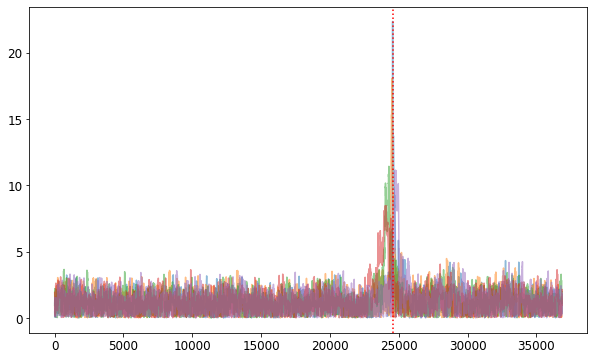

In [10]:
sample_key = 0

plt.figure(figsize=(10,6))
plt.plot(np.copy(snrs[sample_key][0]), alpha=0.5)
plt.plot(np.copy(snrs[sample_key][1]), alpha=0.5)
plt.plot(np.copy(snrs[sample_key][2]), alpha=0.5)
plt.plot(np.copy(snrs[sample_key][3]), alpha=0.5)
plt.plot(np.copy(snrs[sample_key][4]), alpha=0.5)
plt.axvline(6*4096, c='red', linestyle='dotted')
plt.show()

In [115]:
# Sample indexes 1 and 7 (samples 2 and 8) are having issues with there being an injection (or a really low power one)

# Prior to looking at the waveforms file to see if they are empty, I am thinking its a time-series projection issue

# On review, the samples 2 and 8 do have injections in the waveforms file. The issues appears that one of the polarisations
# (the second in the file) is scaled down heavily while the other is at an expected magnitude. Hence, I need to look into
# whether we are using this low amplitude signal which might be the reason for them not showing up in the SNR time-series.
# Alternatively, it might not be about the polarisation used, but in the orientation of the binary and whether it is actually
# detectable in the first place.

# I had a brief look by eye at the parameters in the parameters.csv and couldn't identify anything that would necessarily 
# cause this issue. Now worth looking into which strain we are using from the waveforms file to make projections in noise

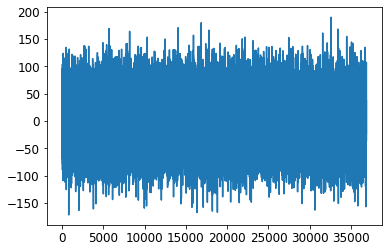

In [11]:
plt.plot(projections[1,0])
plt.show()

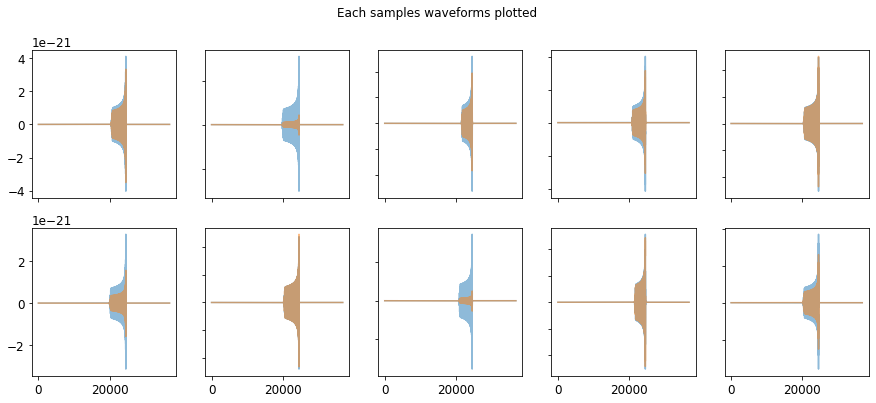

In [13]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5)
fig.suptitle('Each samples waveforms plotted')

fig.set_figwidth(15)
fig.set_figheight(6)

ax1.plot(waveforms[0,0], alpha=0.5)
ax1.plot(waveforms[0,1], alpha=0.5)

ax2.plot(waveforms[1,0], alpha=0.5)
ax2.plot(waveforms[1,1], alpha=0.5)

ax3.plot(waveforms[2,0], alpha=0.5)
ax3.plot(waveforms[2,1], alpha=0.5)

ax4.plot(waveforms[3,0], alpha=0.5)
ax4.plot(waveforms[3,1], alpha=0.5)

ax5.plot(waveforms[4,0], alpha=0.5)
ax5.plot(waveforms[4,1], alpha=0.5)

ax6.plot(waveforms[5,0], alpha=0.5)
ax6.plot(waveforms[5,1], alpha=0.5)

ax7.plot(waveforms[6,0], alpha=0.5)
ax7.plot(waveforms[6,1], alpha=0.5)

ax8.plot(waveforms[7,0], alpha=0.5)
ax8.plot(waveforms[7,1], alpha=0.5)

ax9.plot(waveforms[8,0], alpha=0.5)
ax9.plot(waveforms[8,1], alpha=0.5)

ax10.plot(waveforms[9,0], alpha=0.5)
ax10.plot(waveforms[9,1], alpha=0.5)

for ax in fig.get_axes():
    ax.label_outer()

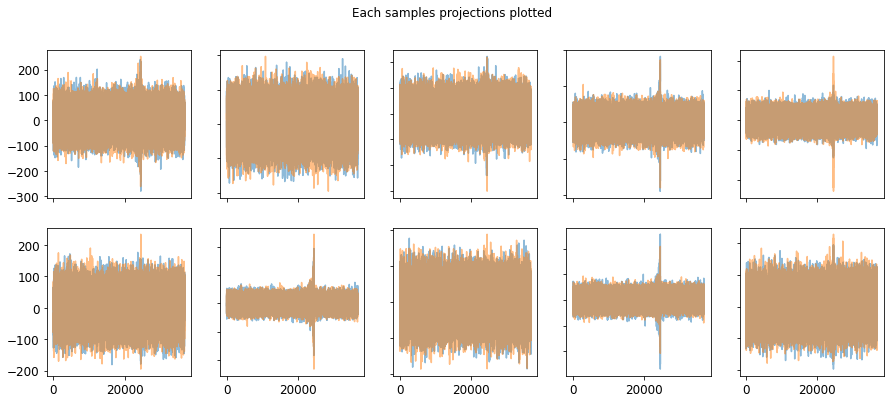

In [15]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5)
fig.suptitle('Each samples projections plotted')

fig.set_figwidth(15)
fig.set_figheight(6)

ax1.plot(projections[0,0], alpha=0.5)
ax1.plot(projections[0,1], alpha=0.5)

ax2.plot(projections[1,0], alpha=0.5)
ax2.plot(projections[1,1], alpha=0.5)

ax3.plot(projections[2,0], alpha=0.5)
ax3.plot(projections[2,1], alpha=0.5)

ax4.plot(projections[3,0], alpha=0.5)
ax4.plot(projections[3,1], alpha=0.5)

ax5.plot(projections[4,0], alpha=0.5)
ax5.plot(projections[4,1], alpha=0.5)

ax6.plot(projections[5,0], alpha=0.5)
ax6.plot(projections[5,1], alpha=0.5)

ax7.plot(projections[6,0], alpha=0.5)
ax7.plot(projections[6,1], alpha=0.5)

ax8.plot(projections[7,0], alpha=0.5)
ax8.plot(projections[7,1], alpha=0.5)

ax9.plot(projections[8,0], alpha=0.5)
ax9.plot(projections[8,1], alpha=0.5)

ax10.plot(projections[9,0], alpha=0.5)
ax10.plot(projections[9,1], alpha=0.5)

for ax in fig.get_axes():
    ax.label_outer()

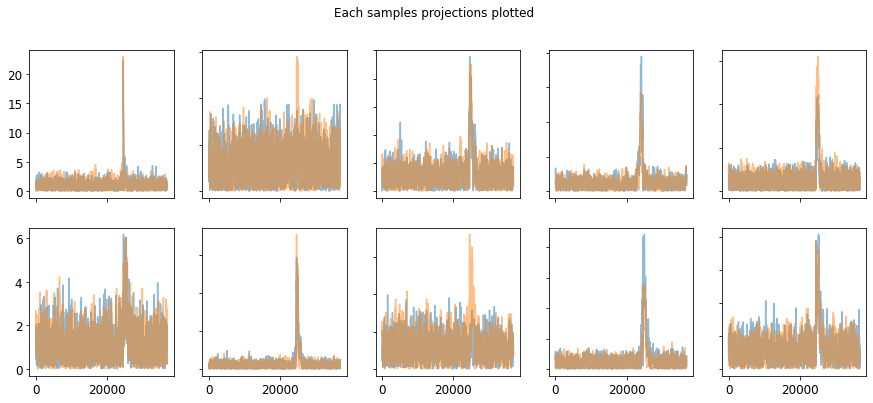

In [36]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5)
fig.suptitle('Each samples projections plotted')

fig.set_figwidth(15)
fig.set_figheight(6)

ax1.plot(snrs[0][0][0], alpha=0.5)
ax1.plot(snrs[0][1][0], alpha=0.5)

ax2.plot(snrs[1][0][0], alpha=0.5)
ax2.plot(snrs[1][1][0], alpha=0.5)

ax3.plot(snrs[2][0][0], alpha=0.5)
ax3.plot(snrs[2][1][0], alpha=0.5)

ax4.plot(snrs[3][0][0], alpha=0.5)
ax4.plot(snrs[3][1][0], alpha=0.5)

ax5.plot(snrs[4][0][0], alpha=0.5)
ax5.plot(snrs[4][1][0], alpha=0.5)

ax6.plot(snrs[5][0][0], alpha=0.5)
ax6.plot(snrs[5][1][0], alpha=0.5)

ax7.plot(snrs[6][0][0], alpha=0.5)
ax7.plot(snrs[6][1][0], alpha=0.5)

ax8.plot(snrs[7][0][0], alpha=0.5)
ax8.plot(snrs[7][1][0], alpha=0.5)

ax9.plot(snrs[8][0][0], alpha=0.5)
ax9.plot(snrs[8][1][0], alpha=0.5)

ax10.plot(snrs[9][0][0], alpha=0.5)
ax10.plot(snrs[9][1][0], alpha=0.5)

for ax in fig.get_axes():
    ax.label_outer()

(2, 5, 36864)
[0.47343849 0.36810913 0.26666218 ... 0.7477052  0.66931382 0.57242677]
[0.59842697 0.61069806 0.66086532 ... 0.74291436 0.68249154 0.63126453]


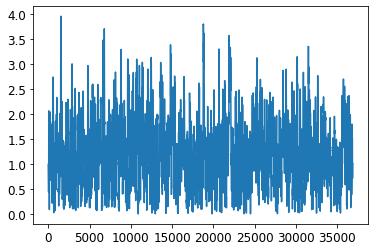

In [34]:
print(np.shape(snrs[0]))
print(snrs[0][0][0])
print(snrs[0][1][0])

plt.plot(snrs[7][0][0])
# plt.plot(snrs[7][1][0])
plt.show()